# Linear bias correction

Apply linear bias correction methods (below) to each of the pre-trained embeddings (VGGish, OpenL3, YAMNet):
- ` ` (original): original embedding
- `LDA`: linear discriminant analysis (LDA)
- `mLDA`: linear discriminant analysis for multiple bias correction 

In [1]:
%matplotlib inline

import sys 
# add parental directory to Python path
sys.path.insert(0, '..')

import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from deem import deem

In [2]:
param_grid = {'LR_param': {'C':[10**k for k in range(-8, 4, 1)]}, 'scoring': 'roc_auc', 'cv': 3, 'random_state': 42}

with open("../data/openmic-2018/openmic_classmap_10.json", "r") as f: # only consider 10 classes of Openmic dataset
    openmic_class_map = json.load(f)
    
# use a dict to align the classes between Openmic dataset (key) and Irmas dataset (val)
with open("../data/class_align.json", "r") as f: 
    class_align = json.load(f)

with open("../data/genre_map.json", "r") as f: 
    genre_map = json.load(f)

with open("../data/instrument_map.json", "r") as f: 
    instrument_map = json.load(f)

## VGGish

In [3]:
embedding = 'vggish'
debias_method = ''  # no debiasing, i.e. use the original embedding

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='../embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid, class_align=class_align)

irmas_feature = deb.load_irmas()
openmic_feature = deb.load_openmic()

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Load IRMAS data:


  7%|▋         | 499/6705 [00:00<00:02, 2482.11it/s]

100%|██████████| 6705/6705 [00:02<00:00, 3042.87it/s]


# Train: 4997,  # Test: 1666
Load OpenMIC data:


100%|██████████| 5085/5085 [00:00<00:00, 18569.86it/s]


# Train: 6838,  # Test: 2491
Train on irmas, test on irmas


100%|██████████| 10/10 [00:58<00:00,  5.86s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [00:53<00:00,  5.36s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [00:50<00:00,  5.10s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [00:43<00:00,  4.35s/it]


In [4]:
debias_method = '-lda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Train on irmas, test on irmas


100%|██████████| 10/10 [00:45<00:00,  4.52s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [00:45<00:00,  4.59s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [00:40<00:00,  4.09s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [00:49<00:00,  4.97s/it]


In [5]:
debias_method = '-mlda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

deb.result_all.to_csv('../results/result_' + embedding + debias_method + '.csv', index=False)
result_all = deb.result_all

Train on irmas, test on irmas


100%|██████████| 10/10 [00:50<00:00,  5.03s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [00:46<00:00,  4.64s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [00:48<00:00,  4.87s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [00:50<00:00,  5.06s/it]


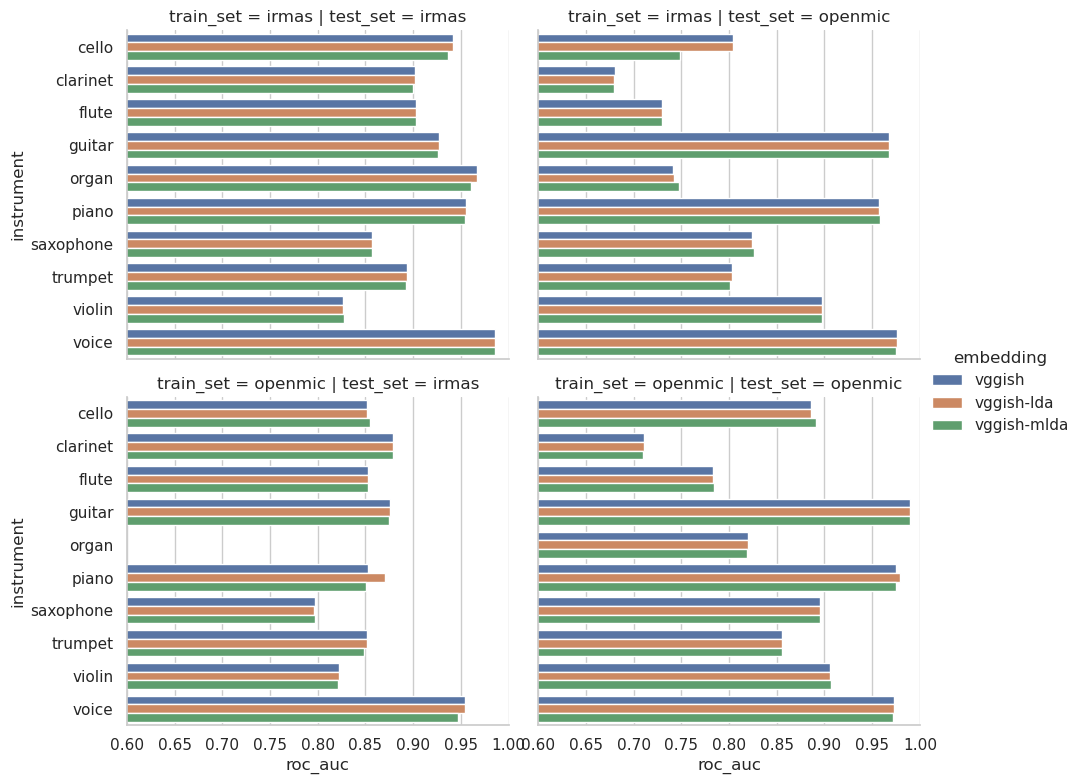

In [6]:
df = pd.read_csv('../results/result_' + embedding + debias_method + '.csv')

sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=df, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('../results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')

## OpenL3

In [7]:
embedding = 'openl3'
debias_method = ''

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='../embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid, class_align=class_align)

irmas_feature = deb.load_irmas()
openmic_feature = deb.load_openmic()

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Load IRMAS data:


100%|██████████| 6705/6705 [00:28<00:00, 234.06it/s]


# Train: 4997,  # Test: 1666
Load OpenMIC data:


100%|██████████| 5085/5085 [00:00<00:00, 25494.41it/s]


# Train: 6838,  # Test: 2491
Train on irmas, test on irmas


100%|██████████| 10/10 [00:46<00:00,  4.62s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [01:00<00:00,  6.03s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [00:53<00:00,  5.36s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [00:43<00:00,  4.35s/it]


In [8]:
debias_method = '-lda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Train on irmas, test on irmas


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [00:44<00:00,  4.41s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [00:43<00:00,  4.31s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [00:52<00:00,  5.21s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [00:48<00:00,  4.81s/it]


In [9]:
debias_method = '-mlda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

deb.result_all.to_csv('../results/result_' + embedding + debias_method + '.csv', index=False)
result_all = result_all.append(deb.result_all)

Train on irmas, test on irmas


100%|██████████| 10/10 [00:48<00:00,  4.86s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [00:51<00:00,  5.12s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [00:52<00:00,  5.30s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [00:52<00:00,  5.22s/it]


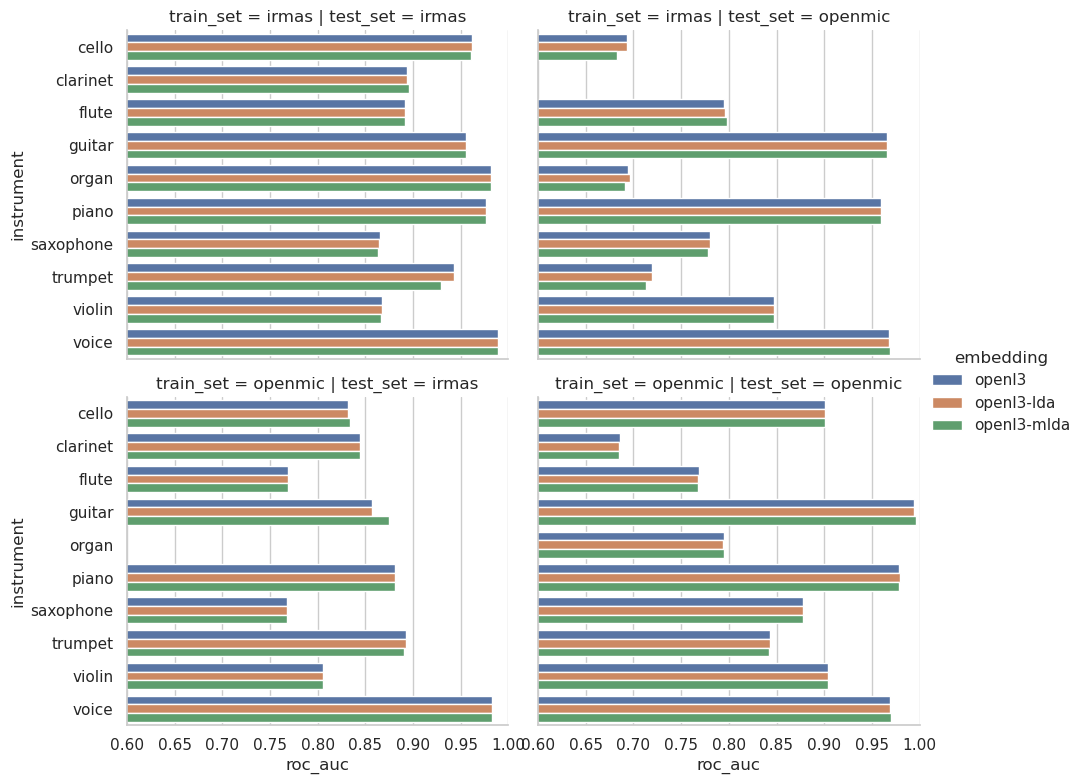

In [10]:
df = pd.read_csv('../results/result_' + embedding + debias_method + '.csv')

sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=df, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('../results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')

## YAMNet

In [11]:
embedding = 'yamnet'
debias_method = ''

deb = deem(embedding = embedding, debias_method = debias_method, feature_dir='../embeddings.h5', 
           instrument_map=instrument_map, genre_map=genre_map, param_grid=param_grid, class_align=class_align)

irmas_feature = deb.load_irmas()
openmic_feature = deb.load_openmic()

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Load IRMAS data:


100%|██████████| 6705/6705 [00:04<00:00, 1595.36it/s]


# Train: 4997,  # Test: 1666
Load OpenMIC data:


100%|██████████| 5085/5085 [00:00<00:00, 29059.80it/s]


# Train: 6838,  # Test: 2491
Train on irmas, test on irmas


100%|██████████| 10/10 [00:37<00:00,  3.73s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [00:35<00:00,  3.55s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [00:43<00:00,  4.36s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [00:44<00:00,  4.44s/it]


In [12]:
debias_method = '-lda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

Train on irmas, test on irmas


  0%|          | 0/10 [00:00<?, ?it/s]

100%|██████████| 10/10 [01:09<00:00,  6.98s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [01:08<00:00,  6.87s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [01:16<00:00,  7.61s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [01:23<00:00,  8.34s/it]


In [13]:
debias_method = '-mlda'

deb.debias_method = debias_method

deb.instrument_classfication(train_set='irmas', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='irmas', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='openmic', irmas_feature=irmas_feature, openmic_feature=openmic_feature)
deb.instrument_classfication(train_set='openmic', test_set='irmas', irmas_feature=irmas_feature, openmic_feature=openmic_feature)

deb.result_all.to_csv('../results/result_' + embedding + debias_method + '.csv', index=False)
result_all = result_all.append(deb.result_all)

Train on irmas, test on irmas


100%|██████████| 10/10 [01:32<00:00,  9.25s/it]


Train on irmas, test on openmic


100%|██████████| 10/10 [01:30<00:00,  9.01s/it]


Train on openmic, test on openmic


100%|██████████| 10/10 [01:34<00:00,  9.45s/it]


Train on openmic, test on irmas


100%|██████████| 10/10 [01:33<00:00,  9.31s/it]


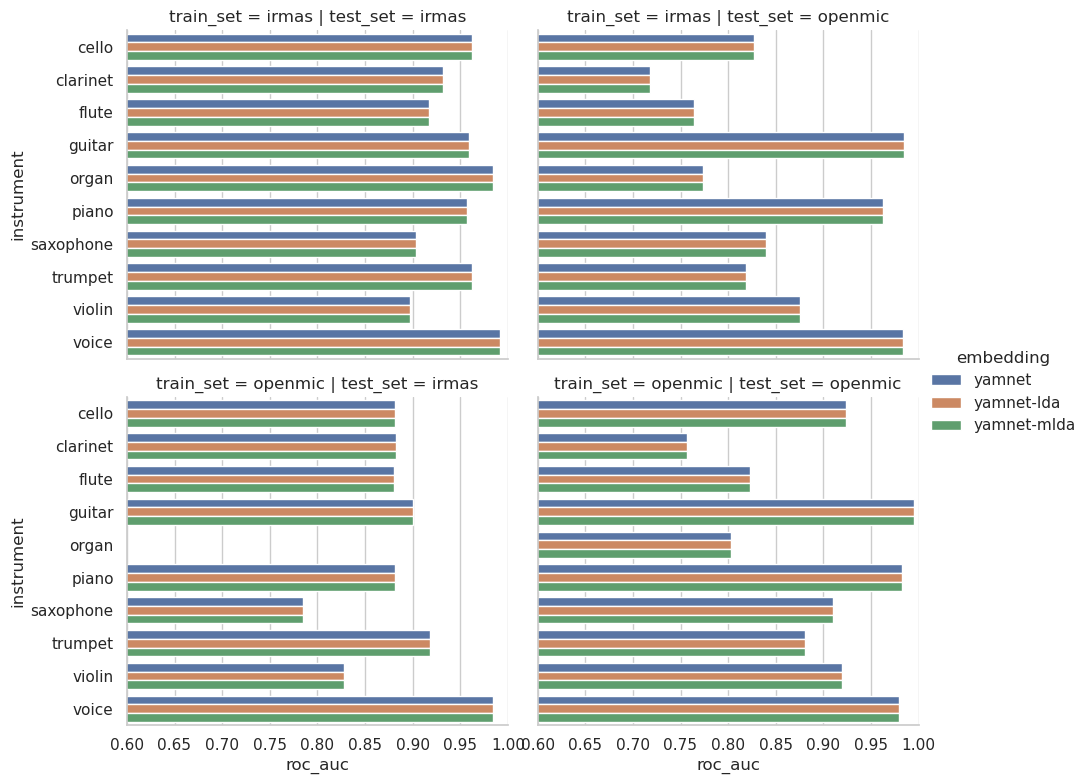

In [14]:
df = pd.read_csv('../results/result_' + embedding + debias_method + '.csv')

sns.set_theme(context='notebook', style='whitegrid', palette='deep')

sns.catplot(data=df, row='train_set', col='test_set', y='instrument', x='roc_auc', hue='embedding', kind='bar', 
            height=4, aspect=1.2, ci=None)
plt.xlim([0.6,1])
plt.savefig('../results/' + embedding  + debias_method + '.pdf', bbox_inches='tight')

In [15]:
result_all.to_csv('../results/result_linear_all.csv', index=False)

In [16]:
result_all

,instrument,train_set,test_set,precision,recall,f1-score,support,accuracy,roc_auc,ap,embedding
0,cello,irmas,irmas,0.3015267175572519,0.8404255319148937,0.44382022471910115,94.0,0.8811524609843937,0.9419766119863571,0.6042162765192624,vggish
1,clarinet,irmas,irmas,0.2970027247956403,0.8582677165354331,0.44129554655870445,127.0,0.8343337334933973,0.9015875939484171,0.5907064158870868,vggish
2,flute,irmas,irmas,0.3310104529616725,0.7851239669421488,0.46568627450980393,121.0,0.8691476590636255,0.9033886972104096,0.6236143314373876,vggish
3,guitar,irmas,irmas,0.5584905660377358,0.8554913294797688,0.6757990867579908,346.0,0.82953181272509,0.9275945874934314,0.814941720357818,vggish
4,organ,irmas,irmas,0.4653179190751445,0.9252873563218391,0.6192307692307691,174.0,0.8811524609843937,0.9666266062679116,0.7598714716810079,vggish
...,...,...,...,...,...,...,...,...,...,...,...
115,piano,openmic,irmas,0.2055944055944056,0.8647058823529412,0.33220338983050846,170.0,0.6452581032412965,0.8814407046240956,0.6596000142485331,yamnet-mlda
116,saxophone,openmic,irmas,0.20281124497991967,0.6733333333333333,0.3117283950617284,150.0,0.7322929171668667,0.7844722955145119,0.32212512089625794,yamnet-mlda
117,trumpet,openmic,irmas,0.2875536480686695,0.8933333333333333,0.43506493506493504,150.0,0.7911164465786314,0.9181090589270009,0.6483110849866238,yamnet-mlda
118,violin,openmic,irmas,0.21621621621621623,0.7832167832167832,0.3388804841149773,143.0,0.7376950780312125,0.82777826244668,0.3440882358229241,yamnet-mlda
